In [3]:
# importing Qiskit
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_provider import IBMProvider
import random
import matplotlib.pyplot as plt

In [4]:
import hashlib

# Function to generate a hash for the binary string
def generate_hash(binary_string):
    # Hash the binary string using SHA-256
    hash_object = hashlib.sha256(binary_string.encode('utf-8'))
    return hash_object.hexdigest()

# Function to compute the Hamming distance between two hash strings
def hamming_distance(hash1, hash2):
    # Convert hex hashes to binary strings
    bin_hash1 = bin(int(hash1, 16))[2:].zfill(256)  # SHA-256 produces 256-bit hash
    bin_hash2 = bin(int(hash2, 16))[2:].zfill(256)
    
    # Count the number of differing bits
    return sum(bit1 != bit2 for bit1, bit2 in zip(bin_hash1, bin_hash2))

# Function to calculate similarity based on the Hamming distance between hashes
def calculate_similarity(hash1, hash2):
    # Compute the Hamming distance between the two hashes
    hamming_dist = hamming_distance(hash1, hash2)
    similarity = 100 * (1 - hamming_dist / 256)  # 256 is the length of the hash in bits (for SHA-256)
    return similarity

# Example usage
binary_string1 = "1001101010101"
binary_string2 = "1100101010101"

# Generate hashes for both strings
hash1 = generate_hash(binary_string1)
hash2 = generate_hash(binary_string2)

# Calculate similarity
similarity = calculate_similarity(hash1, hash2)
print(f"Similarity: {similarity:.2f}%")


def convert_to_binary_string(arr):
    # Map 1 to '1' and -1 to '0' and join the list into a string
    return ''.join(['1' if x == 1 else '0' for x in arr])

Similarity: 57.81%


In [5]:
import itertools
array_length = 6
all_possible_arrays = list(itertools.product([1, -1], repeat=array_length))

# Collect data for plotting
differences = []
similarities = []

# Run simulation for all possible combinations of Alice and Bob arrays
for alice_array in all_possible_arrays:
    for bob_array in all_possible_arrays:
        # Count the number of differing positions between Alice and Bob's arrays
        difference_count = sum(1 for a, b in zip(alice_array, bob_array) if a != b)

        # Calculate SimHash for Alice and Bob


        # Calculate Hamming distance between their SimHashes
        distance = lsh_similarity(convert_to_binary_string(alice_array), convert_to_binary_string(bob_array),4)

        # Store data for plotting
        differences.append(difference_count)
        similarities.append(distance)

# Plotting similarity vs number of differing positions
plt.scatter(differences, similarities, alpha=0.5)
plt.xlabel("Number of differing positions")
plt.ylabel("Hamming distance (Similarity measure)")
plt.title("Similarity vs Number of differing positions")
plt.grid(True)
plt.show()

NameError: name 'lsh_similarity' is not defined

In [64]:
import numpy as np

def generate_qber_based_weights(L, K, N, QBER):
    # Step 1: Generate Alice's weights
    alice_weights = np.random.randint(-L, L + 1, (K, N))
    
    # Step 2: Copy Alice's weights to create Bob's weights
    bob_weights = alice_weights.copy()
    
    # Calculate the number of bits to flip based on the QBER
    num_elements = K * N  # Total number of weights
    num_errors = int(QBER * num_elements)  # Calculate the number of errors to introduce
    
    # Randomly select indices to introduce errors
    error_indices = np.random.choice(num_elements, num_errors, replace=False)
    
    # Introduce errors by flipping the weights at selected indices in Bob's weights
    for index in error_indices:
        row, col = divmod(index, N)
        
        # Choose a new value for the weight at (row, col) that differs from the current value
        original_value = bob_weights[row, col]
        possible_values = list(set(range(-L, L + 1)) - {original_value})
        bob_weights[row, col] = np.random.choice(possible_values)
    
    return alice_weights, bob_weights

# Example usage:
L = 5     # Range of weights [-L, L]
K = 10    # Number of neurons in the hidden layer
N =  10   # Number of inputs for each neuron
QBER = 0.01  # 3% Quantum Bit Error Rate

alice_weights, bob_weights = generate_qber_based_weights(L, K, N, QBER)
print("Alice's Weights:\n", alice_weights)
print("\nBob's Weights:\n", bob_weights)

# Optional: Check the percentage of different weights
num_differences = np.sum(alice_weights != bob_weights)
similarity = (1 - num_differences / (K * N)) * 100
print(f"\nSimilarity: {similarity:.2f}%")


Alice's Weights:
 [[-2 -3  4  3  5 -5 -4  1  3 -5]
 [-4  2  4 -2 -1 -2 -2  3  5 -5]
 [ 5 -1  1 -1  0  2  0 -5  3 -5]
 [ 1  1 -4 -3  3 -5  1 -4 -1 -5]
 [ 5  3 -5 -1 -4  4  5  3  5 -4]
 [ 3 -3  2  1  5  3 -5  3  5 -3]
 [-1  4  2 -1 -4  2 -3  4 -2  0]
 [ 4 -5 -1  2 -1  0 -2  1 -3  0]
 [-1  2  0  4 -5  1 -1  5 -4 -1]
 [-2 -4  5  0  2 -3 -5  0  3  1]]

Bob's Weights:
 [[-2 -3  4  3  5 -5 -4  1  3 -5]
 [-4  2  4 -2 -1 -2 -2  3  5 -5]
 [ 5 -1  5 -1  0  2  0 -5  3 -5]
 [ 1  1 -4 -3  3 -5  1 -4 -1 -5]
 [ 5  3 -5 -1 -4  4  5  3  5 -4]
 [ 3 -3  2  1  5  3 -5  3  5 -3]
 [-1  4  2 -1 -4  2 -3  4 -2  0]
 [ 4 -5 -1  2 -1  0 -2  1 -3  0]
 [-1  2  0  4 -5  1 -1  5 -4 -1]
 [-2 -4  5  0  2 -3 -5  0  3  1]]

Similarity: 99.00%


In [23]:
class TreeParityMachine:
    def __init__(self, K, N, L,initial_weights):
        self.K = K
        self.N = N
        self.L = L
        self.weights = initial_weights

    def compute_hidden_neurons(self, x):
        return np.array([sgn(np.dot(x[k], self.weights[k])) for k in range(self.K)])

    def compute_output(self, x):
        hidden_outputs = self.compute_hidden_neurons(x)
        half_size = len(hidden_outputs) // 2
        first_half = hidden_outputs[:half_size]
        second_half = hidden_outputs[half_size:]
        
        product_of_first_half = np.prod(first_half)
        product_of_second_half = np.prod(second_half)
        return np.prod(hidden_outputs), hidden_outputs,product_of_first_half,product_of_second_half,

    def update_weights(self, x, hidden_outputs, tau,part):
        if part == 0:
            # Iterate over the full array from 0 to self.K
            range_to_iterate = range(self.K)
        elif part == 1:
            # Iterate over the first half of the array
            half_size = len(hidden_outputs) // 2
            range_to_iterate = range(half_size)  # First half
        else:
            # Iterate over the second half of the array
            half_size = len(hidden_outputs) // 2
            range_to_iterate = range(half_size, len(hidden_outputs))

        for k in range_to_iterate:
            for n in range(self.N):
                if  tau==hidden_outputs[k]:
                    self.weights[k][n] += hidden_outputs[k] * x[k][n]
                    self.weights[k][n] = max(-self.L, min(self.L, self.weights[k][n]))


def sgn(z):
    return 1 if z > 0 else -1



In [66]:
def perform_sync(K,N,L,M,QBER):

    if QBER==-1:
        alice_weights = np.random.randint(-L, L + 1, (K, N))
        bob_weights =   np.random.randint(-L, L + 1, (K, N)) 
    else:
        alice_weights, bob_weights = generate_qber_based_weights(L, K, N, QBER)

    tpm_A = TreeParityMachine(K, N, L,alice_weights)
    tpm_B = TreeParityMachine(K, N, L,bob_weights)

# Synchronization process
    iterations = 0
    sync = False
    weight_differences = []  

    while not sync:
        x = np.random.choice([-1, 1], (K, N))

    # Each TPM computes its output
        tau_A, hidden_A,tau_half_A,tau_second_half_A = tpm_A.compute_output(x)
        tau_B, hidden_B,tau_half_B,tau_second_half_B = tpm_B.compute_output(x)

    # Check if both outputs are equal, use combined tau variable if so
        if tau_A == tau_B:
            tau = tau_A  # Combined tau as outputs are equal
            tpm_A.update_weights(x, hidden_A, tau,0)
            tpm_B.update_weights(x, hidden_B, tau,0)
        elif(M and tau_half_A==tau_half_B):
            tau = tau_half_A
            tpm_A.update_weights(x, hidden_A, tau,1)
            tpm_B.update_weights(x, hidden_B, tau,1)
        elif(M and tau_second_half_A==tau_second_half_B):
            tau = tau_second_half_A
            tpm_A.update_weights(x, hidden_A, tau,2)
            tpm_B.update_weights(x, hidden_B, tau,2)

    # Calculate the weight difference between the two TPMs
        weight_diff = np.sum(tpm_A.weights != tpm_B.weights)
        weight_differences.append(weight_diff)

    # Check for synchronization if weight difference is zero
        if weight_diff == 0:
            sync = True
        else:
            iterations += 1
    return iterations,weight_differences

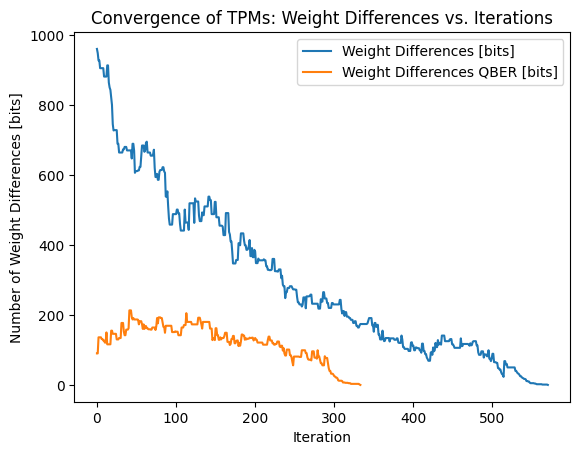

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
K = 30  # Number of neurons in the hidden layer
N = 40  # Number of inputs to each neuron
L = 2  # Range of weights, weights are in [-L, L]
QBER = 0.03

weight_differences = perform_sync(K,N,L,False,-1)[1]
weight_differences_QBER = perform_sync(K,N,L,False,0.03)[1]

# Plot the weight differences over iterations
plt.plot(weight_differences, label="Weight Differences [bits]")
plt.plot(weight_differences_QBER, label="Weight Differences QBER [bits]")



plt.xlabel("Iteration")
plt.ylabel("Number of Weight Differences [bits]")
plt.title("Convergence of TPMs: Weight Differences vs. Iterations")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example array of total iterations (replace with your own data)
iterations_list=np.array([])
iterations_list2=np.array([])
for i in range(2**7):
    iterations_list=np.append(iterations_list,perform_sync(K,N,L,False,-1)[0])
    iterations_list2=np.append(iterations_list,perform_sync(K,N,L,False,QBER)[0])


    

# Plot the histogram of the iterations


In [ ]:

mean1 = np.mean(iterations_list)
std_dev1 = np.std(iterations_list)

mean2 = np.mean(iterations_list2)
std_dev2 = np.std(iterations_list2)

x1 = np.linspace(mean1 - 4*std_dev1, mean1 + 4*std_dev1, 1000)
x2 = np.linspace(mean2 - 4*std_dev2, mean2 + 4*std_dev2, 1000)

# Generate the Gaussian distribution based on the mean and std_dev
y1 = norm.pdf(x1, mean1, std_dev1)
y2 = norm.pdf(x2, mean2, std_dev2)

plt.plot(x1, y1, 'r-', label=f'Gaussian Distribution for random weight \nMean: {mean1:.2f}, Std Dev: {std_dev1:.2f}')

plt.plot(x2, y2, 'g-', label=f'Gaussian Distribution with QBER based weight \nMean: {mean2:.2f}, Std Dev: {std_dev2:.2f}')

# Add labels, title, and legend
plt.xlabel('Iterations')
plt.ylabel('Density')
plt.title('Distribution of Iterations to Complete Task')
plt.legend()

# Show the plot
plt.show()
